# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib.pyplot as plt

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


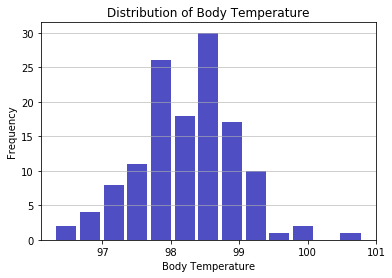

<Figure size 1440x720 with 0 Axes>

In [4]:
n, bins, patches = plt.hist(x=df.temperature, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Body Temperature')
plt.figure(figsize=(20,10))
plt.show()

In [5]:
print('mean=%.3f stdv=%.3f' % (np.mean(df.temperature), np.std(df.temperature)))

mean=98.249 stdv=0.730


Quantile-Quantile Plot

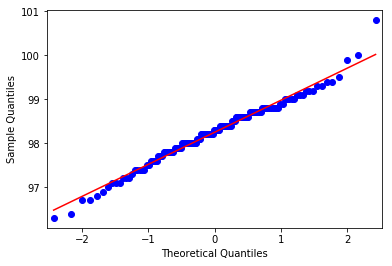

In [6]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.temperature, line='s')
plt.show()

Normal Test:
* Shapiro-Wilk Test
* D’Agostino’s K^2 Test

In [7]:
from scipy.stats import shapiro
from scipy.stats import normaltest
stat, p = shapiro(df.temperature)
stat_normal, p_normal = normaltest(df.temperature)
print('Shapiro-Wilk Test')
print('Statistics = %.3f, p = %.3f \n' % (stat, p))
print('D’Agostino’s K^2 Test')
print('Statistics = %.3f, p = %.3f \n' % (stat_normal, p_normal))
print('Alpha Value = 0.05 \n')
# interpret
alpha = 0.05
if p > alpha:
    print('According to Shapiro-Wilk Test, Sample looks Gaussian (fail to reject H0)')
else:
    print('According to Shapiro-Wilk Test, Sample does not look Gaussian (reject H0)')
if p_normal > alpha:
    print('According to D’Agostino’s K^2 Test, Sample looks Gaussian (fail to reject H0)')
else:
    print('According to D’Agostino’s K^2 Test, Sample does not look Gaussian (reject H0)')


Shapiro-Wilk Test
Statistics = 0.987, p = 0.233 

D’Agostino’s K^2 Test
Statistics = 2.704, p = 0.259 

Alpha Value = 0.05 

According to Shapiro-Wilk Test, Sample looks Gaussian (fail to reject H0)
According to D’Agostino’s K^2 Test, Sample looks Gaussian (fail to reject H0)


## Bootstrap Hypothesis Test

Is body temperature truly 98.6 degrees F? 

Current Sample Stat

Step 1: State null and alternative hypotheses:
H0: mean = 98.6

In [8]:
print('mean=%.3f stdv=%.3f' % (np.mean(df.temperature), np.std(df.temperature)))

mean=98.249 stdv=0.730


Step 2: Shifting Data

In [9]:
translated_force_b = df.temperature - np.mean(df.temperature) + 98.6

Step 3: Bootstrap Replicates

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [11]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [12]:
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

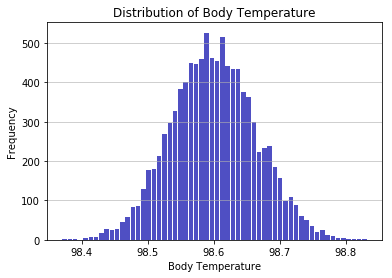

<Figure size 1440x720 with 0 Axes>

In [13]:
n, bins, patches = plt.hist(x=bs_replicates, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Body Temperature')
plt.figure(figsize=(20,10))
plt.show()

Step 4: Calculate p-value

In [14]:
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


Reject Null Hypothesis. The true population mean is not 98.6 degrees F

Confidence Interval of the bootstrap hypothesis test.

In [15]:
print (np.percentile(bs_replicates, [2.5, 97.5]))

[98.47613462 98.72692308]


## Frequentist Statistical Testing

This is a one sample test because we are looking at the statistical difference between a sample mean (body temperature of the data set) and a known the mean in the population (98.6 for more than 120 years)

Since the standard deviation of the population is unknown, it is better to use a t test statistic.

Assumptions of T-test:

* All data points are random selected.
* The sampling distribution of the data sample mean is approximately normal.
* The sample size is reasonably large(N > 30). In this case, we have a sample size of 130. 
* We don't know if we are sampling without replacement. But our sample size shouldn't be more than 10 percent of the population.

Our significance level, $\alpha$, is 0.05

H<sub>o</sub>: $\mu$ = 98.6  <br> H<sub>a</sub>: $\mu$ $\neq$ 98.6

$$\frac{\bar{x}- \mu}{\frac{S_x}{\sqrt{n}}}$$

In [18]:
n = df.temperature.count()
t_stat_whole_sample = (np.mean(df.temperature)-98.6)/(np.std(df.temperature)/np.sqrt(n))
print (t_stat_whole_sample)

-5.475925202078116


In [20]:
from scipy.stats import t
p_value = t.cdf(t_stat_whole_sample, n-1)
print (p_value)

1.0943732312047587e-07


$$p < \alpha$$
Reject Null Hypothesis. The true population mean is not 98.6 degrees F

Taking a sample of 10

In [21]:
sample10 = np.random.choice(df.temperature, 10)

In [22]:
print('mean=%.3f stdv=%.3f' % (np.mean(sample10), np.std(sample10)))

mean=98.530 stdv=0.948


In [51]:
n = len(sample10)
t_stat = (np.mean(sample10)-98.6)/(np.std(sample10)/np.sqrt(n))

T test

In [24]:
from scipy.stats import t
p_value = t.cdf(t_stat, n-1)
print (p_value)

0.41026867052562366


Z test

In [25]:
from scipy.stats import norm
z_stat = (np.mean(sample10)-98.6)/(np.std(sample10)/np.sqrt(n)) # standard deviation of whole sample
norm.cdf(z_stat)

0.40765552010636996

Both Reject the null hypothesis

In [26]:
data_mean = np.mean(df.temperature)

In [27]:
data_std = np.std(df.temperature)

In [28]:
print('mean=%.3f stdv=%.3f' % (data_mean, data_std))

mean=98.249 stdv=0.730


In [29]:
margin_error = 1.9977*data_std/(np.sqrt(df.temperature.count()))
confidence_inter = [data_mean-margin_error, data_mean+margin_error]
print ('We are 95% confidence that the normal range of body temperature is between ' + str(confidence_inter[0])[0:5]+' and '+str(confidence_inter[1])[0:5] )

We are 95% confidence that the normal range of body temperature is between 98.12 and 98.37


## Two Sample t-test

Since we are comparing two samples, the mean of body temperature of male and female group, we would need to use a two sample t-test

In [30]:
male_df = df.loc[(df['gender'] == 'M'), ['temperature','heart_rate']]
female_df = df.loc[(df['gender'] == 'F'), ['temperature','heart_rate']]

In [31]:
male_mean = np.mean(male_df.temperature)
male_std = np.std(male_df.temperature)
female_mean = np.mean(female_df.temperature)
female_std = np.std(female_df.temperature)
male_n = male_df.temperature.count()
female_n = female_df.temperature.count()

In [48]:
def ecdf(data): #Empirical cumulative distribution function (ECDF)
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [49]:
x_male, y_male = ecdf(male_df.temperature)
x_female, y_female = ecdf(female_df.temperature)

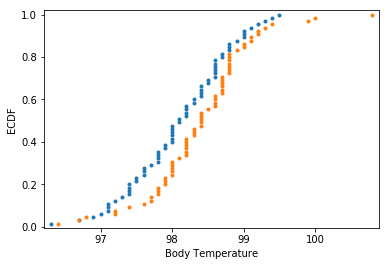

In [50]:
plt.plot(x_male, y_male, marker='.', linestyle='none')
plt.plot(x_female, y_female, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
plt.xlabel('Body Temperature')
plt.ylabel('ECDF')
#plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [32]:
t_test = (male_mean-female_mean) /(np.sqrt((male_std**2/male_n)+(female_std**2/female_n)))

In [52]:
p_value_2sample = t.cdf(t_test, male_n*2-2)*2

In [53]:
p_value_2sample

0.022879279869584303

$$p < \alpha$$
Reject Null Hypothesis. There are significant difference between males and females in normal temperature.

In [35]:
margin_error = 1.9977*data_std/(np.sqrt(df.temperature.count()))
confidence_inter = [data_mean-margin_error, data_mean+margin_error]
print ('We are 95% confidence that the normal range of body temperature is between ' + str(confidence_inter[0])[0:5]+' and '+str(confidence_inter[1])[0:5] )

We are 95% confidence that the normal range of body temperature is between 98.12 and 98.37
